# Determinación de la constante de Planck 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit 
from scipy.stats import linregress as lr 
import sympy as sym

In [3]:
G = np.genfromtxt('/home/jp/Escritorio/Cs. Físicas UDEC/S4/Laboratorio I /Proyecto final - Constante de Planck/Base de datos/Verde_datos.txt',delimiter=";")
R = np.genfromtxt('/home/jp/Escritorio/Cs. Físicas UDEC/S4/Laboratorio I /Proyecto final - Constante de Planck/Base de datos/Rojo_datos.txt',delimiter=";")
B = np.genfromtxt('/home/jp/Escritorio/Cs. Físicas UDEC/S4/Laboratorio I /Proyecto final - Constante de Planck/Base de datos/Azul_datos.txt',delimiter=";")
Y = np.genfromtxt('/home/jp/Escritorio/Cs. Físicas UDEC/S4/Laboratorio I /Proyecto final - Constante de Planck/Base de datos/Amarillo_datos.txt',delimiter=";")
#G = datos LED verde, R = datos LED rojo, B = datos LED azul , Y = datos LED amarillo/home/jp/Escritorio/Cs Físicas UDEC/S4/Laboratorio I/Proyecto final - Constante de Planck/Base de datos/

In [4]:
#Definimos las constantes a utilizar 
e = 1.6e-19 #Carga del electrón 
c = 3e8 #Velocidad de la luz 

## 1.- Ecuaciones y modelo 

## 1.1 Circuito 
De acuerdo a la Ley de Kirchow la ecuación del circuito es: 

\begin{equation}
    I = \frac{V_{cc} -V_{D}}{R+ R_{1} }
\end{equation}

Donde $I$ es la corriente en función del tiempo, $V_{D}$ es la tensión en el diodo, $R(t)$ es la resistencia del potenciometro (variable y cuyo valor máximo es $10 K\Omega $) y $R_{1}$ la resistencia en el circuito cuyo valor nominal es de $330  \Omega $.

\begin{equation}
    I = \frac{5 -V_{D}}{R + 330}
\end{equation}

## 1.2 Energía de un fotón de luz 

\begin{align}
    E &= hf \\
    &= \frac{h\  c}{\lambda} \approx eV_{c} \\
    &\Rightarrow V_{c} = \frac{h\  c}{\lambda e} 
\end{align}

In [324]:
def h(Vc,A):
    return 1.6e-19*Vc*A/3e8  # se define la función Cte de Planck que depende de las variabes 
                       # Vc = tensión, A = lamda (longitud de onda), e y c previamente definidas


In [5]:
Vr_g = G[:,0] #tensión medida en la resistencia     LED verde
Vd_g = G[:,1] #tensión medida en el diodo           LED verde

Vr_r = R[:,0] #tensión medida en la resistencia     LED rojo
Vd_r = R[:,1] #tensión medida en el diodo p         LED rojo

Vr_b = B[:,0] #tensión medida en la resistencia     LED azul
Vd_b = B[:,1] #tensión medida en el diodo           LED azul

Vr_y = Y[:,0] #tensión medida en la resistencia    LED amarillo
Vd_y = Y[:,1] #tensión medida en el diodo          LED amarillo

## 2.-   Conversión 
El intervalo de las tensiones va de los $0 V $ a los $5 V $ y es discretizado por el arduino en números enteros en el intervalo $[0,1023]$. En vista de ello es necesario hacer una conversión a través de la siguiente relación:
\begin{equation}
    V_{d} = \frac{5}{1023} V'_{d}
\end{equation}
Donde $V_{d}$ corresponde a la tensión medida en el diodo para cada color, por ello definimos la función conver(). 

In [6]:
def conver(Vd_color):
    return 5/(1023.0) * Vd_color 

In [7]:
Vd_G = conver(Vd_g) 
Vd_R = conver(Vd_r) 
Vd_B = conver(Vd_b) 
Vd_Y = conver(Vd_y) 
Vr_G = conver(Vr_g)
Vr_R = conver(Vr_r) 
Vr_B = conver(Vr_b) 
Vr_Y = conver(Vr_y)  

## 3.- Cálculo de la corriente
Aplicando la ley de Ohm en el resistencia de valor nominal $330\Omega$
\begin{equation}
I = \frac{V_{R}}{R}
\end{equation}
y haciendo la conversión de los datos 
\begin{equation}
I =  \frac{\frac{5}{1023} V'_{R}}{330} = \frac{conver(V_{R})}{330} 
\end{equation}

### Sensibilidad de Arduino es de 5 [mV]

Podemos considerar que cada valor del voltaje correspone a una única medida, por lo que para cada valor de la tensión  el error experimental esta determinado por la sensibilidad del del instrumento, que para Arduino UNO es de $ 5[mV]$. Notar que, $V_{D} = \frac{5}{1023} V'_{d}$ de modo que $\Delta V_{D} = \frac{\partial V_{D}}{\partial V'_{D}} \Delta V'_{D} $. Luego como la sensibilidad del arduino para medir los voltajes es de  de $5 [mV]$ (valor convertido)  y como $\frac{\partial V_{D}}{\partial V'_{D}}$  es una diferencial completa, entonces,
\begin{equation}
    \Delta V_{D} =  2.5 \cdot 10^{-3}[V]$
\end{equation}
Analogamente podemos mostrar que $\Delta V_{R}$  posee el mismo valor. Por lo que podemos referirnos al valor del error para las tensiones es  $\Delta V_{D} =2.5\cdot 10^{-3} [V] $ y en milivoltios $\Delta V_{D}= 2.5[mV]$.

In [8]:
R = 330 
I_g =  Vr_G /R
I_r =  Vr_R /R
I_b =  Vr_B /R
I_y =  Vr_Y /R

Aplicando el método para determinar errores para la corriente, tenemos que : 
\begin{equation}
    \Delta I = \frac{\partial I}{\partial V_{R}} \Delta V_{R}  =\frac{\partial (\frac{V_{R}}{R})}{\partial V_{R}} \Delta V_{R} = \frac{1}{R}\Delta V_{R} + \frac{V_{R}}{R^{2}}\Delta R
\end{equation}
Suponiendo que $\Delta R = \Delta V$

Pero como la corriente es calculada en el resistor, entonces podemos considerar que su valor es constante  $(R= 3330)$ para diferencias infinitesimales de la tensión y su eror es :
\begin{equation}
    \Delta I = \frac{1}{R}\Delta V_{R}  + \frac{V_{R}}{R^{2}}\Delta R= \frac{\Delta V_{R}}{R} = \frac{2.5\cdot 10^{-3}}{330}  + V_{R}\frac{2.5\cdot 10^{-3}}{330^{2}}  
\end{equation}
 Luego del error de la corriente es $\Delta I= 7.6 \cdot 10^{-6} + 2.3\cdot 10^{-8}V_{R}$ 

In [9]:
def dI(Vr):
    return 7.6e-6 + 2.3e-8 *Vr

# Visualización del a curva característica de cada LED


In [10]:
#Se define error corriente (variable)
dI_g = dI(Vr_G) 
dI_r = dI(Vr_R)
dI_b = dI(Vr_B)
dI_y = dI(Vr_Y)

Text(0.5, 1.0, 'Curva característica de cada LED')

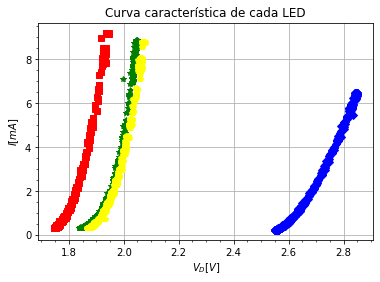

In [11]:
plt.errorbar(Vd_G, 1e3*I_g,fmt = "*",xerr=2.5e-3, yerr=1e3*dI_g,color="green", ecolor='black',elinewidth=1, capsize=2)
plt.errorbar(Vd_R, 1e3*I_r,fmt = "s",xerr=2.5e-5, yerr=1e3*dI_r,color="red", ecolor='black',elinewidth=1, capsize=2)
plt.errorbar(Vd_B, 1e3*I_b,fmt = "D",xerr=2.5e-3, yerr=1e3*dI_b,color="blue", ecolor='black',elinewidth=1, capsize=2)
plt.errorbar(Vd_Y, 1e3*I_y,fmt = "p",xerr=2.5e-3, yerr=1e3*dI_y,color="yellow", ecolor='black',elinewidth=1, capsize=2)
plt.minorticks_on()
plt.grid(True)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva característica de cada LED")

Text(0.5, 1.0, 'Curva característica de cada LED verde ')

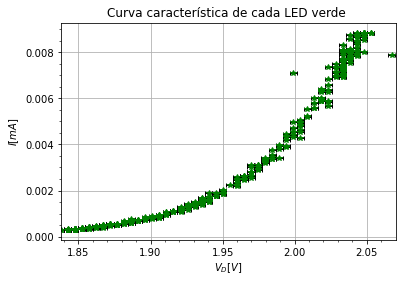

In [88]:
plt.errorbar(Vd_G, I_g,fmt = "*",xerr=2.5e-3, yerr= dI_g,color="green", ecolor='black',elinewidth=1, capsize=2)
plt.minorticks_on()
plt.grid(True)
plt.xlim(np.min(Vd_G),2.07)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva característica de cada LED verde ")

Text(0.5, 1.0, 'Curva característica de cada LED rojo')

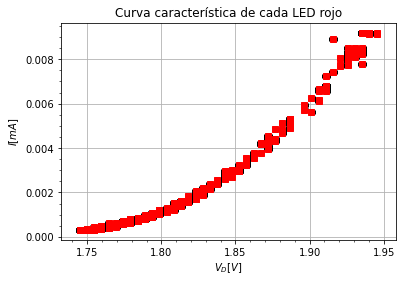

In [12]:
plt.errorbar(Vd_R, I_r, fmt='s',xerr=2.5e-3, yerr= dI_r,color="red", ecolor='black',elinewidth=1, capsize=2)
plt.minorticks_on()
plt.grid(True)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva característica de cada LED rojo")

Text(0.5, 1.0, 'Curva característica de cada LED azul')

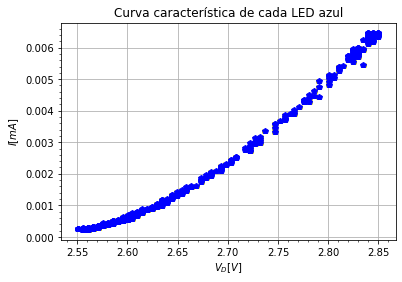

In [13]:
plt.errorbar(Vd_B, I_b, fmt='p',xerr=2.5e-3, yerr=dI_b,color="blue", ecolor='yellow',elinewidth=1, capsize=2)
plt.minorticks_on()
plt.grid(True)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva característica de cada LED azul")

Text(0.5, 1.0, 'Curva característica de cada LED Amarillo')

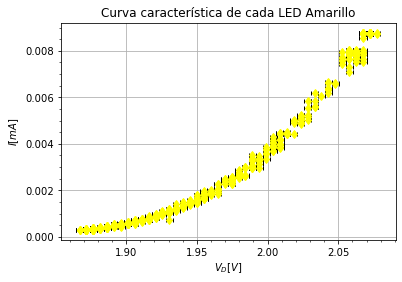

In [14]:
plt.errorbar(Vd_Y, I_y, fmt='d',xerr=2.5e-3, yerr= dI_y,color="yellow", ecolor='black',elinewidth=1, capsize=2)
plt.minorticks_on()
plt.grid(True)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva característica de cada LED Amarillo")

## 3.- Análisis de datos

Usaremos el método gráfico para calcular el potencial de barrera. 

En el resistor vemos que la corriente :

\begin{equation}
    i = \frac{V_{R}}{330}
\end{equation}

Luego,  $V_{R} = 5 - V_{D}$ , entonces 
\begin{equation}
    i = \frac{5-V_{d}}{330+R} = \frac{5}{330+R} - \frac{V_{d}}{330+R}
\end{equation}
Esta ecuación corresponde a la recta de carga.

Si en la recta de carga consideramos a $V_{D} = 0[V]$ entonces la corriente $i = \frac{5}{330+R}$. Pero si la corriente es nula, entonces $V_{D} =  5[V]$.

La ecuación del diodo de acuerdo al modelo bblabla es
\begin{equation}
    I = I_{0}\left (e^{\frac{V_{D}}{V_{t}}} -1 \right )
\end{equation}

donde $V_{T} = \frac{kT}{q}$ es el voltaje térmico ( $k = 1.38\cdot 10^{-23} \frac{J}{K}$ es la constante de Boltzman, $T [K]$ es la temperatura absoluta y $q = 1.6\cdot 10^{-19} [K]$  es la carga del electrón). Reemplazando las constantes 

\begin{equation}
    I = I_{0}\left (e^{\frac{1.6\cdot 10^{-19} V_{D}}{1.38\cdot 10^{-23} T}} -1 \right )
\end{equation}

assoajasjo

\begin{equation}
    I = I_{0}\left (e^{\frac{1.38\cdot 10^{4} V_{D}}{1.6 T}} -1 \right )
\end{equation}



In [15]:
def cuadratico(x,p,n,m):
    return m +(x*n) + p*(x**2)

def lineal(x,p,n):
    return n+p*x
def exponencial(Vd,Io,VT):
    return Io*(np.e**(Vd/VT)-1) 

# Ajuste de curva y cálculo de voltaje de activación LED verde, usando MC ponderados.

I0*  3.4823446880893913e-16 VT= 0.06629300735282248


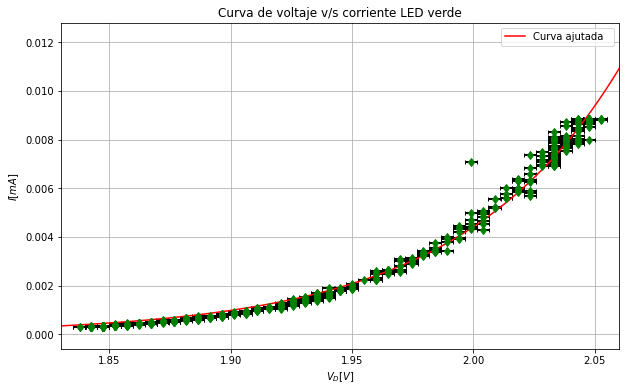

In [16]:
xx_g = np.linspace(0.9,np.max(Vd_G), len(Vd_G)) 
#u = np.e**(1.38e4/1.6)

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [1, 1]


#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff_g,matrix_g = curve_fit(exponencial, Vd_G, I_g,pk,sigma =dI_g)
A_g,B_g = coeff_g
print("I0* ",A_g,"VT=",B_g)

plt.figure(figsize=(10,6))
plt.errorbar(Vd_G, I_g, fmt='d',xerr=2.5e-3, yerr= dI_g,color="green", ecolor='black',elinewidth=2, capsize=2)
plt.plot(xx_g,exponencial(xx_g,A_g,B_g), label='Curva ajutada  ',color = "red")
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva de voltaje v/s corriente LED verde")
plt.xlim(1.83,2.06)
plt.legend()
plt.grid(True)

Del ajuste extraemos el valor de $I_{0}$ y $VT$. 

Luego, igualando las corrientes en la  ecuación del diodo con la ecuación de la recta de carga tenemos que 
\begin{equation}
    I_{0}(e^{\frac{V_{D}}{V_{T}}}-1) =  \frac{5}{330+R} - \frac{V_{D}}{330+R}
\end{equation}

7.010355301230627e-05


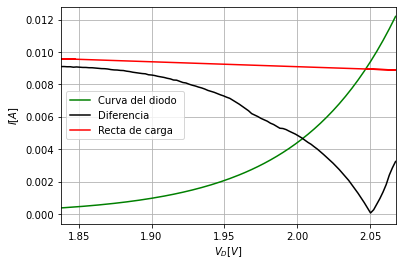

In [17]:
#Función recta de carga ,donde  I/V = R (resistencia equivalente)
def i_(I,Vd):
    return 5/(330+(I/Vd)) - Vd/(330+(I/Vd))
i_G = i_(I_g,Vd_G)
res_g = np.sqrt(( exponencial(xx_g,A_g,B_g)- i_G)**2)
#Cuando res = 0 la recta se intersecta con la curva de corriente.Es decir
#las raices de la ecuación res = 0.
print(np.min(res_g))
#resp = sym.solve([i_G,exponencial(xx,A,B)],dict = True)
#print(resp)

plt.xlim(np.min(Vd_G),np.max(Vd_G))
plt.plot(xx_g,exponencial(xx_g,A_g,B_g),color = "green",label = "Curva del diodo ")
plt.plot(xx_g,res_g, color = "black", label = "Diferencia")
plt.plot(Vd_G,i_G,color = "red", label = "Recta de carga")
plt.legend()
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

In [18]:
#Para encontrar el punto de intersección definimos la función diferencia
def d(i_,phi):
    return i_-phi
d_g = d(i_G,exponencial(xx_g,A_g,B_g))
#Un ciclo for que busca el punto de intersección 
for i in range(len(d_g)-1):
    if d_g[i]==0. or d_g[i]*d_g[i+1]<0.:
        rot_g = xx_g[i]
print(rot_g,exponencial(rot_g,A_g,B_g))
Va_g= rot_g #se define el voltaje de activación         

2.0502803174055546 0.009408842025910953


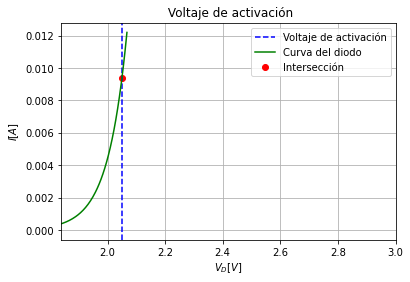

In [19]:
plt.scatter(rot_g,exponencial(rot_g,A_g,B_g),color = "red",label ="Intersección")
plt.axvline(rot_g,0,1,label = "Voltaje de activación",linestyle = "dashed",color = "blue")
plt.plot(xx_g,exponencial(xx_g,A_g,B_g),color = "green",label = "Curva del diodo ")
plt.legend()
plt.xlim(np.min(Vd_G),3)
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.title(" Voltaje de activación")
plt.grid(True)

# Ajuste de curva y cálculo de voltaje de activación LED rojo

I0*  5.948299776138826e-15 VT= 0.06900069981993266


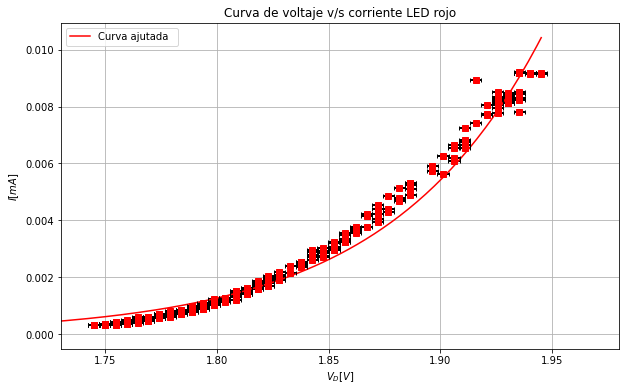

In [169]:
xx_r = np.linspace(0.9,np.max(Vd_R), len(Vd_R)) 
#u = np.e**(1.38e4/1.6)

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk_r = [1, 1]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff_r,matrix_r = curve_fit(exponencial,Vd_R, I_r,pk_r,sigma =dI_r)
A_r,B_r = coeff_r

print("I0* ",A_r,"VT=",B_r)

plt.figure(figsize=(10,6))
plt.plot(xx_r,exponencial(xx_r,A_r,B_r), label='Curva ajutada  ',color = "red")
plt.errorbar(Vd_R, I_r, fmt='s',xerr=2.5e-3, yerr= dI_r,color="red", ecolor='black',elinewidth=2, capsize=2)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva de voltaje v/s corriente LED rojo")
plt.xlim(1.73,1.98)
plt.legend()
plt.grid(True)

4.5783834850158384e-05


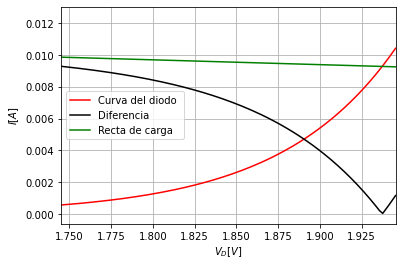

In [170]:
i_R = i_(I_r,xx_r)
res_r = np.sqrt(( exponencial(xx_r,A_r,B_r)- i_R)**2)
#Cuando res = 0 la recta se intersecta con la curva de corriente.Es decir
#las raices de la ecuación res = 0.
print(np.min(res_r))
#resp = sym.solve([i_G,exponencial(xx,A,B)],dict = True)
#print(resp)

plt.xlim(np.min(Vd_R),np.max(Vd_R))
plt.plot(xx_r,exponencial(xx_r,A_r,B_r),color = "red",label = "Curva del diodo ")
plt.plot(xx_r,res_r, color = "black", label = "Diferencia")
plt.plot(xx_r,i_R,color = "green", label = "Recta de carga")
plt.legend()
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

In [171]:
d_r = d(i_R,exponencial(xx_r,A_r,B_r))
#Un ciclo for que busca el punto de intersección 
for i in range(len(d_r)-1):
    if d_r[i]==0. or d_r[i]*d_r[i+1]<0.:
        rot_r = xx_r[i]
print(rot_r,exponencial(rot_r,A_r,B_r))
Va_r= rot_r #se define el voltaje de activación         

1.9356695095375178 0.009070080025017878


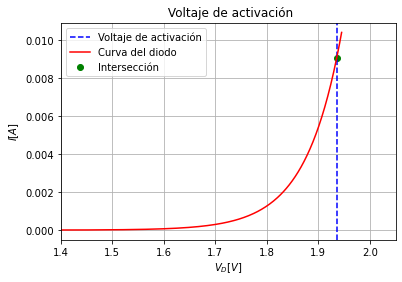

In [172]:
#plt.errorbar(rot_r,exponencial(rot_r,A_r,B_r), fmt='s',xerr=2.5e-3, yerr= dI_r,color="red", ecolor='black',elinewidth=2, capsize=2)
plt.scatter(rot_r,exponencial(rot_r,A_r,B_r),color = "green",label ="Intersección")
plt.axvline(rot_r,0,1,label = "Voltaje de activación",linestyle = "dashed",color = "blue")
plt.plot(xx_r,exponencial(xx_r,A_r,B_r),color = "red",label = "Curva del diodo ")
plt.legend()
plt.xlim(1.4,2.05)
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.title(" Voltaje de activación")
plt.grid(True)

# Ajuste de curva y cálculo de voltaje de activación LED Azul

I0*  1.284917920116467e-13 VT= 0.11526091139450237


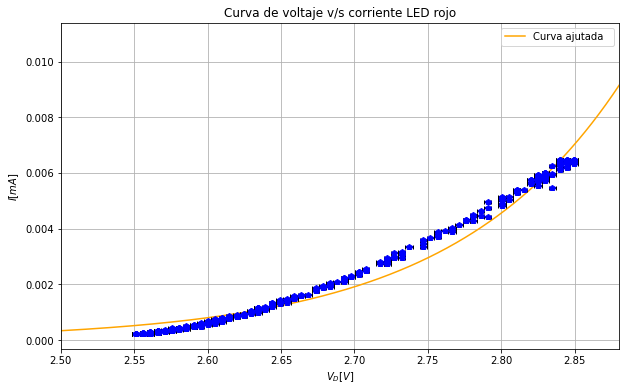

In [173]:
xx_b = np.linspace(2.5,2.9, len(Vd_B)) 
#u = np.e**(1.38e4/1.6)

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk_b = [1, 1]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff_b,matrix_b = curve_fit(exponencial, Vd_B, I_b,pk_b,sigma = dI_b)
A_b,B_b = coeff_b
datos_ajustados = exponencial(xx_g, *coeff_b)  #curva ajustada
print("I0* ",A_b,"VT=",B_b)


plt.plot(xx_b,exponencial(xx_b,A_b,B_b), label='Curva ajutada  ',color = "orange")
plt.errorbar(Vd_B, I_b, fmt='p',xerr=2.5e-3, yerr= dI_b,color="blue", ecolor='black',elinewidth=2, capsize=2)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva de voltaje v/s corriente LED rojo")
plt.xlim(2.5,2.88)
plt.figure(figsize=(10,6))
plt.legend()
plt.grid(True)

5.001235609803506e-06


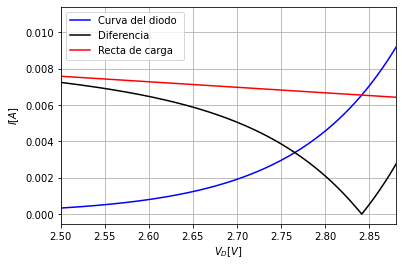

In [174]:
i_B = i_(I_b,xx_b)
res_b = np.sqrt(( exponencial(xx_b,A_b,B_b)- i_B)**2)
#Cuando res = 0 la recta se intersecta con la curva de corriente.Es decir
#las raices de la ecuación res = 0.
print(np.min(res_b))

plt.xlim(np.min(Vd_B),3)
plt.plot(xx_b,exponencial(xx_b,A_b,B_b),color = "blue",label = "Curva del diodo ")
plt.plot(xx_b,res_b, color = "black", label = "Diferencia")
plt.plot(xx_b,i_B,color = "red", label = "Recta de carga")
plt.legend()
plt.xlim(2.5,2.88)
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

In [175]:
d_b = d(I_b,exponencial(xx_b,A_b,B_b))
#Un ciclo for que busca el punto de intersección 
for i in range(len(d_b)-1):
    if d_b[i]==0. or d_b[i]*d_b[i+1]<0.:
        rot_b = xx_b[i]
print(rot_b,exponencial(rot_b,A_b,B_b))
Va_b= rot_b #se define el voltaje de activación  

2.8307392996108947 0.0059551000798428715


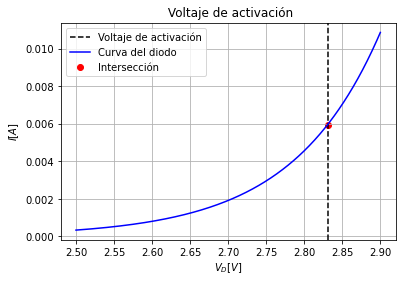

In [176]:
plt.scatter(rot_b,exponencial(rot_b,A_b,B_b),color = "red",label ="Intersección")
plt.axvline(rot_b,0,1,label = "Voltaje de activación",linestyle = "dashed",color = "black")
plt.plot(xx_b,exponencial(xx_b,A_b,B_b),color = "blue",label = "Curva del diodo ")
plt.legend()
#plt.xlim(1.4,2.05)
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.title(" Voltaje de activación")
plt.grid(True)

# Ajuste de curva y cálculo de voltaje de activación LED Amarilo

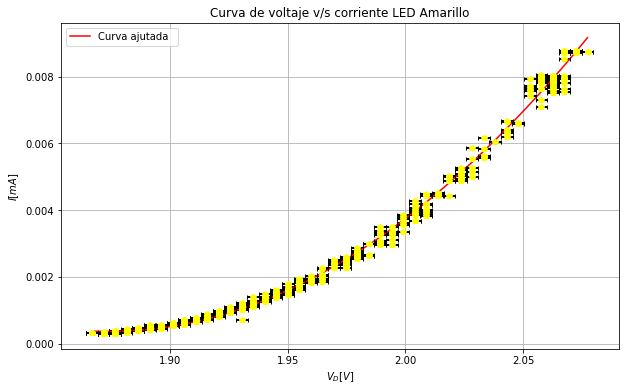

In [151]:
xx_y = np.linspace(np.min(Vd_Y),np.max(Vd_Y), len(Vd_Y)) 
#u = np.e**(1.38e4/1.6)

#MC ponderados con polyfit
coeff_y =np.polyfit(Vd_Y,I_y,2,w =1/dI_y)
y_yy= np.polyval(np.polyfit(Vd_Y,I_y,2,w =1/dI_y),xx_y)


plt.figure(figsize=(10,6))
plt.plot(xx_y,cuadratico(xx_y,*coeff_y), label='Curva ajutada  ',color = "red")
plt.errorbar(Vd_Y, I_y, fmt='p',xerr=2.5e-3, yerr= dI_y,color="yellow", ecolor='black',elinewidth=2, capsize=2)
plt.ylabel("$I[mA]$")
plt.xlabel("$V_D [V]$")
plt.title("Curva de voltaje v/s corriente LED Amarillo")
plt.legend()
plt.grid(True)

8.124283119165243e-08


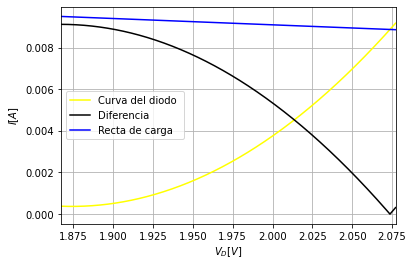

In [177]:
i_Y = i_(I_y,xx_y)
res_y = np.sqrt(( cuadratico(xx_y,*coeff_y)- i_Y)**2)
#Cuando res = 0 la recta se intersecta con la curva de corriente.Es decir
#las raices de la ecuación res = 0.
print(np.min(res_y))
plt.xlim(np.min(Vd_Y),np.max(Vd_Y))
plt.plot(xx_y,cuadratico(xx_y,*coeff_y),color = "yellow",label = "Curva del diodo ")
plt.plot(xx_y,res_y, color = "black", label = "Diferencia")
plt.plot(xx_y,i_Y,color = "blue", label = "Recta de carga")
plt.legend()
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

In [178]:
d_y = d(i_Y,cuadratico(xx_y,*coeff_y))
#Un ciclo for que busca el punto de intersección 
for i in range(len(d_y)-1):
    if d_y[i]==0. or d_y[i]*d_y[i+1]<0.:
        rot_y = xx_y[i]
print(rot_y,cuadratico(rot_y,*coeff_y))
Va_y= rot_y #se define el voltaje de activación         

2.0733643723573176 0.008837765575213763


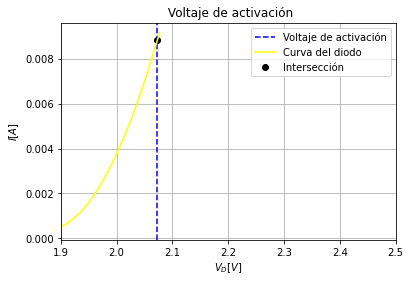

In [182]:
plt.scatter(rot_y,cuadratico(rot_y,*coeff_y),color = "black",label ="Intersección")
plt.axvline(rot_y,0,1,label = "Voltaje de activación",linestyle = "dashed",color = "blue")
plt.plot(xx_y,cuadratico(xx_y,*coeff_y),color = "yellow",label = "Curva del diodo ")
plt.legend()
plt.xlim(1.9,2.5)
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.title(" Voltaje de activación")
plt.grid(True)

# Ajuste lineal para las tensiones mayores al potencial de activación

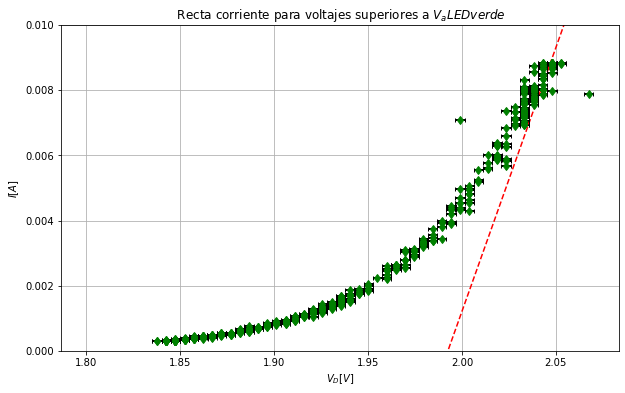

In [260]:
xa_g = np.linspace(Va_g,max(Vd_G),100)
dI_gg = dI(xa_g) 
#Ajuste de curva
pa_g = np.polyfit(xa_g,exponencial(xa_g,*coeff_g),1, w= 1/dI_gg)#Ajuste a un polinomio de grado 1 donde p es un arreglo con los coeficientes
Pyy_g =  lineal(xa_r,pa_r[0],pa_r[1])
xxx_g = np.linspace(1.8,max(Vd_G),100)
TTT_g =pa_g[0]*xxx_g + pa_g[1]
plt.figure(figsize=(10,6))
plt.title(" Recta corriente para voltajes superiores a $V_{a} LED verde$")
plt.ylim(0,0.01)
plt.plot(xxx_g,TTT_g,linestyle = "dashed" ,color = "red", label = "Curva ajustada")
plt.errorbar(Vd_G, I_g, fmt='d',xerr=2.5e-3, yerr= dI_g,color="green", ecolor='black',elinewidth=2, capsize=2)
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

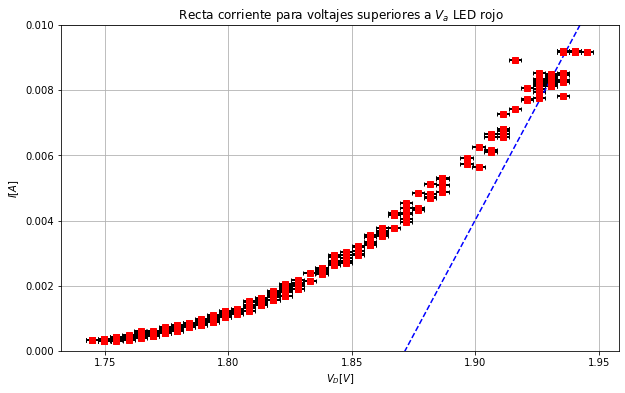

In [261]:
xa_r = np.linspace(Va_r,max(Vd_R),100)
dI_rr = dI(xa_r) 
#Ajuste de curva
pa_r = np.polyfit(xa_r,exponencial(xa_r,*coeff_r),1, w= 1/dI_rr)#Ajuste a un polinomio de grado 1 donde p es un arreglo con los coeficientes
Pyy_r =  lineal(xa_r,pa_r[0],pa_r[1])
xxx_r = np.linspace(1.8,max(Vd_R),100)
TTT_r =pa_r[0]*xxx_r + pa_r[1]

plt.figure(figsize=(10,6))
plt.ylim(0,0.010)
#plt.xlim(2.5,2.88)
plt.title(" Recta corriente para voltajes superiores a $V_{a}$ LED rojo")
plt.errorbar(Vd_R, I_r, fmt='s',xerr=2.5e-3, yerr= dI_r,color="red", ecolor='black',elinewidth=2, capsize=2)
plt.plot(xxx_r,TTT_r,linestyle = "dashed" ,color = "blue", label = "Curva ajustada")
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

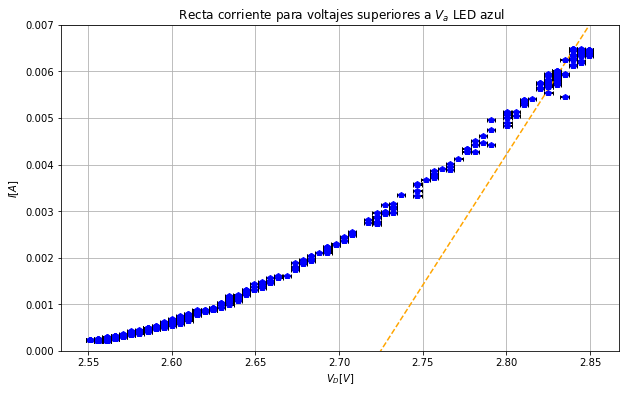

In [262]:
xa_b = np.linspace(Va_b,max(Vd_B),100)
dI_bb = dI(xa_b) 
#Ajuste de curva
pa_b = np.polyfit(xa_b,exponencial(xa_b,*coeff_b),1, w= 1/dI_bb)#Ajuste a un polinomio de grado 1 donde p es un arreglo con los coeficientes
Pyy_b =  lineal(xa_b,pa_b[0],pa_b[1])
xxx_b = np.linspace(min(Vd_B),max(Vd_B),100)
TTT_b =pa_b[0]*xxx_b + pa_b[1]

plt.figure(figsize=(10,6))
plt.ylim(0,0.007)
#plt.xlim(2.5,2.88)
plt.title(" Recta corriente para voltajes superiores a $V_{a}$ LED azul")
plt.errorbar(Vd_B, I_b, fmt='p',xerr=2.5e-3, yerr= dI_b,color="blue", ecolor='black',elinewidth=2, capsize=2)
plt.plot(xxx_b,TTT_b,linestyle = "dashed" ,color = "orange", label = "Curva ajustada")
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

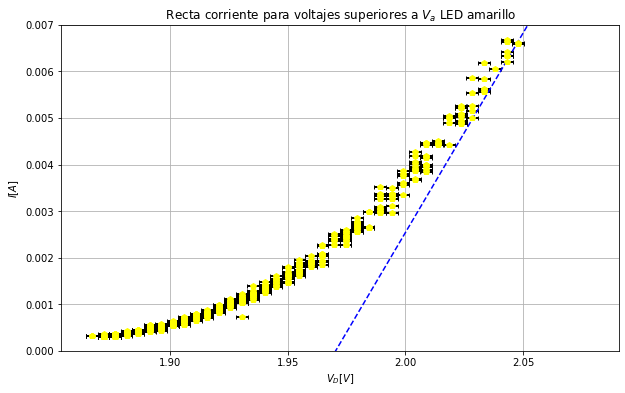

In [263]:
xa_y = np.linspace(Va_y,max(Vd_Y),100)
dI_yy = dI(xa_y) 
#Ajuste de curva
pa_y = np.polyfit(xa_y,cuadratico(xa_y,*coeff_y),1, w= 1/dI_yy)#Ajuste a un polinomio de grado 1 donde p es un arreglo con los coeficientes
Pyy_y =  lineal(xa_y,pa_y[0],pa_y[1])
xxx_y = np.linspace(min(Vd_Y),max(Vd_Y),100)
TTT_y =pa_y[0]*xxx_y + pa_y[1]

plt.figure(figsize=(10,6))
plt.ylim(0,0.007)
#plt.xlim(2.5,2.88)
plt.title(" Recta corriente para voltajes superiores a $V_{a}$ LED amarillo")
plt.errorbar(Vd_Y, I_y, fmt='p',xerr=2.5e-3, yerr= dI_y,color="yellow", ecolor='black',elinewidth=2, capsize=2)
plt.plot(xxx_y,TTT_y,linestyle = "dashed" ,color = "blue", label = "Curva ajustada")
plt.ylabel("$I[A]$")
plt.xlabel("$V_D [V]$")
plt.grid(True)

# Cálculo de $h$ aproximado (método usando la energía de un fotón )

In [325]:
#+- 5
A_g = 5.25e-7
A_r = 6.25e-7
A_b = 4.65e-7
A_y = 5.85e-7
#Vcs = np.asarray([Vcs_g,Vcs_r,Vcs_b,Vcs_y])
Va = np.asarray([Va_g,Va_r,Va_b,Va_y])
lambdaa = np.asarray([A_g,A_r,A_b,A_y])
print(Va)

[2.05028032 1.93566951 2.8307393  2.07336437]


In [326]:
hf= h(Va,lambdaa)
print(hf[0],hf[1],hf[2],hf[3],np.mean(hf))
print("El valor de h es",np.mean(hf),"y su error",np.std(hf))

5.740784888735552e-34 6.452231698458392e-34 7.020233463035017e-34 6.468896841754831e-34 6.420536722995948e-34
El valor de h es 6.420536722995948e-34 y su error 4.5415911549527383e-35


# Cálculo de $h$ mediante modelo de regresión de lineal de la recta :  $V\   v/s \ 1/\lambda$ 

In [329]:
def curvalineal(x,a,b):
    return a*x + b
coeff_h,matrix_h = curve_fit(curvalineal,(1/lambdaa)*1e-6,Va) 
a =coeff_h[0]
b = coeff_h[1]

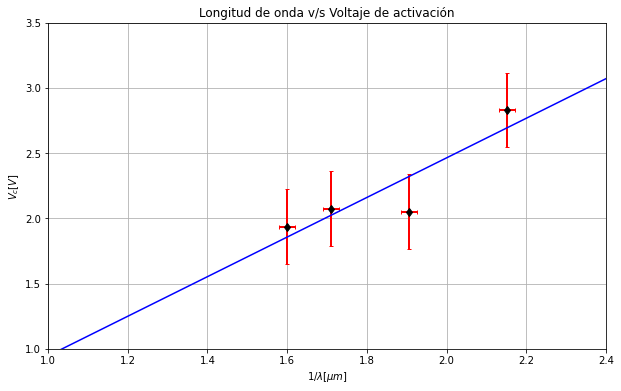

In [330]:
x_h = np.linspace(0,2.5,10)
#el error de 1/h = 1/50 
plt.figure(figsize=(10,6))
plt.errorbar((1/lambdaa)*1e-6,Va,color="black",fmt="d",xerr =1/50 ,yerr = (matrix_h[0,0]),ecolor='red',elinewidth=2, capsize=2)
plt.ylim(1,3.5)
plt.xlim(1,2.4)
plt.errorbar(x_h,curvalineal(x_h,a,b),xerr=5*1e-6,yerr=2.5e-3,color="blue")
plt.ylabel("$V_{c} [V]$")
plt.xlabel("$ 1/\lambda [\mu  m]$")
plt.title("Longitud de onda v/s Voltaje de activación")
plt.grid(True)

In [331]:
e = 1.6e-19 #Carga del electrón 
c = 3e8 #Velocidad de la luz 
h = (a*e/c)*1e-6 
delta = (matrix_h[0,0]*e/c)*1e-6
print(h,delta)

8.095143575246234e-34 1.5261950701477583e-34


$h = 7.151940684594896\cdot 10^{-34} \pm 1.1788981284585662e-34 $

# Ajuste por MC no lineales

Consideramos un conjunto de $len(V)$ de observaciones y una curva (función del modelo) y$=f(x,\beta) $ que además de la variable $x$ también depende de $n$ parámetros, $\beta = (\beta_{1},\beta_{2},...,\beta_{n})$ con $n< len(a_{z})$ Se desea encontrar el vector $\beta$  de parámetros tales que la curva se ajuste mejor a los datos dados en el sentido de mínimos cuadrados, es decir, la suma de cuadrados: 
\begin{equation}
    \chi^{2} = \sum_{i=1}^{m} \left (y_{i}-f(x_{i},\beta )  \right )^{2}
\end{equation}

El mínimo valor de $\chi^{2}$ se produce cuando el gradiente es cero. Dado que el modelo contiene $n$ parámetros hay $n$ ecuaciones de gradiente:

\begin{align}
\frac{\partial \chi^{2} }{\partial \beta_{j}} &= 2 \sum_{i} r_{i} \frac{\partial r_{i}}{\partial \beta_{j}} = 0 \\
 &r_{i} = (y_{i}-f(x_{i},\beta )  ; j = (1,...,n)
\end{align}

En un sistema no lineal, las derivadas $\frac{\partial r_{i}}{\partial \beta_{j}} $ son funciones tanto de la variable independiente como de los parámetros, por lo que estas ecuaciones gradiente no tienen una solución cerrada. En lugar de ello, los valores iniciales deben ser elegidos para los parámetros. Entonces, los parámetros se refinan iterativamente, es decir, los valores se obtienen por aproximación sucesiva:

\begin{equation}
    \beta_{j} \approx \beta_{j}^{k+1} = \beta_{j}^{k} + \Delta \beta_{j} 
\end{equation}

Aquí $k$ es un número de iteración y el vector de incrementos,$\Delta \beta$ que se conoce como el vector de desplazamiento. En cada iteración del modelo se linealiza por aproximación a un primer orden en serie de Taylor de expansión sobre $\beta^{k} $:
\begin{align}
    f(x_{i}.\beta) &\approx f(x_{i},\beta^{k}) + \sum_{j}\frac{\partial f(x_{i},\beta^{k})}{\partial\beta_{j}}\left (\beta_{j} - \beta_{j}^{k}  \right )\\
    &\approx f(x_{i},\beta^{k}) + \sum_{j} J_{ij}\Delta \beta_{j}
\end{align}

El jacobiano , $J$, es una función de las constantes, la variable independiente y los parámetros, por lo que cambia de una iteración a la siguiente. Por lo tanto, en términos del modelo linealizado, $\frac{\partial r_{i}}{\partial \beta_{j}} = -J_{ij} $ y los residuos se dan por

\begin{equation}
    r_{i} = \left (y_{i} - f(x_{i},\beta^{k})  \right ) -\sum_{s=1}^{n} J_{is}\Delta \beta_{s} 
\end{equation}

Sustituyendo estas expresiones en las ecuaciones de gradiente, se convierten  

\begin{equation}
        -2\sum_{i=1}^{m} J_{ij}\left (\left (y_{i} - f(x_{i},\beta^{k})  \right )-\sum_{s=1}^{n} J_{is}\Delta \beta_{s}   \right ) = 0
\end{equation}
que, en el reordenamiento, convertido en $n$ ecuaciones lineales simultáneas, las ecuaciones normales 

\begin{equation}
    \sum_{i=1}^{m} \sum_{s=1}^{n} J_{ij} J_{is}\Delta \beta_{s}   = \sum_{i =1}^{m} J_{ij}\Delta y_{i} \ \  ; j = (1,...,n)
\end{equation}

con $ \Delta y_{i} = \left (y_{i} - f(x_{i},\beta^{k})  \right )$. Luego, las ecuaciones normales se escriben en notación matricial como
\begin{equation}
    \left (J^{T}J  \right )\Delta \beta = J^{T}\Delta y 
\end{equation}

Cuando las observaciones no son igualmente fiable (la dispersión no es la misma para
cada uno de los $y_i$, lo que implicaría que no todos los $y_i$ tienen la misma variabilidad), una suma ponderada de los cuadrados puede ser minimizado. El método de mínimos cuadrados ponderados, contempla diferentes pesos para cada uno de los valores medidos, según el grado de dispersión de cada uno de estos. A cada medición se le asocia un peso $w_{i}$, tal que
\begin{equation}
    \chi ^{2} = \sum_{i =1}^{m} W_{ii}r_{i}^{2}
\end{equation}

Cada elemento de la matriz de peso diagonal W debería, idealmente, ser igual al recíproco de la varianza de error de la medida (  es decir que los pesos sean inversamente proporcionales a la incertidumbre, es decir, le daríamos mayor credibilidad a los $y_{i}$ con menos incertidumbre y menor credibilidad a los $yi$ con mayor incertidumbre.). Esto implica que las observaciones no están correlacionadas. Si las observaciones están correlacionadas, aplica la expresión siguiente:

\begin{equation}
        \chi ^{2} =  \sum_{k =1}\sum_{j =1} r_{k} W_{kj}r_{j}
\end{equation}
En este caso, la matriz de pesos debería idealmente ser igual a la inversa de la matriz error -covarianza de error de las observaciones.Las ecuaciones normales son entonces:

\begin{equation}
    \left (J^{T}W J  \right )\Delta \beta = J^{T}W\Delta y 
\end{equation}

En mínimos cuadrados lineales la función objetivo, $\chi ^{2}$, es una función cuadrática de los parámetros.Con dos o más parámetros, los contornos de $\chi ^{2}$ con respecto a cualquier par de parámetros serán elipses concéntricas. Los valores de los parámetros mínimos se encuentran en el centro de las elipses. Cuanto más los valores de los parámetros difieren de sus valores óptimos, más los contornos se desvían de la forma elíptica. Una consecuencia de esto es que las estimaciones de parámetros iniciales deben ser lo más cercanas posible a sus valores óptimos (desconocidos!). También explica cómo la divergencia puede surgir y como el algoritmo de Gauss-Newton es convergente sólo cuando la función objetivo es aproximadamente cuadrática en los parámetros.




# Residuos
Las diferencias entre los datos medidos y la predicción realizado por el modelo propuesto; es decir son la diferenia entre el valor observado  y el valor ajustado por el modelo. Las métricas mas utilizadas para medir la caldiad del ajuste son el error estándar de los residuos y el coefiene de determinación.  El error estándar de los residuos $\epsilon_{res}$  mide la desviación promedio cualquier punto estimado por el modelo respecto de la curva de regresión. 
\begin{equation}
    \epsilon_{res} = \sqrt{ \frac{\sum \left (y_{i}- \hat{y_{i}} \right )^2 }{n-2}}
\end{equation}

El coeficiente de determinación $R^{2}$ describe la proporción de varianza de la viarable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0  1. Al ser adiensional, presenta la ventaja frente al error estándar resitual de ser más fácil de interpetar. 

\begin{equation}
    R^{2}= \frac{SCT-SCE}{SCT}
\end{equation}
Donde $SCT$ es la suma de los cuadrados totales y $SCE$ es la suma de los cuadrados residuales


In [341]:
def residuo(y,f):
    return np.sqrt((y-f)**2)

#cálculo del residuo de los ajustes de datos 
residuo_g = residuo(I_g,exponencial(Vd_G,*coeff_g)) 
residuo_r = residuo(I_r,exponencial(Vd_R,*coeff_r))
residuo_b = residuo(I_b,exponencial(Vd_B,*coeff_b))
residuo_y = residuo(I_y,cuadratico(Vd_Y,*coeff_y))
residuo_hf = residuo(6.62607015e-34,np.mean(hf)) #residuo para h aproximado usando energía de un fotón 
residuo_h = residuo(6.62607015e-34,h) #residuo de h usando regresión lineal 
print(residuo_hf,residuo_h) 

2.055334270040521e-35 1.469073425246234e-34


Text(0.5, 1.0, 'Gráfico de residuos LED verde')

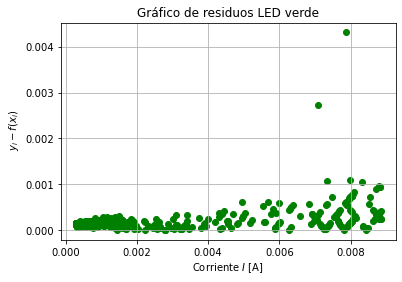

In [335]:
plt.scatter(I_g,residuo_g, color='green') # puntos (frecuncia, residuos)
plt.grid(True)
plt.xlabel('Corriente $I$ [A] ')
plt.ylabel('$\\ y_i -f(x_i)$')
plt.title('Gráfico de residuos LED verde')

Text(0.5, 1.0, 'Gráfico de residuos LED rojo')

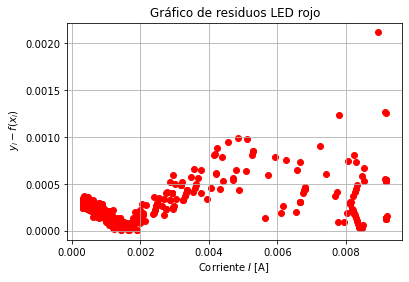

In [336]:

plt.scatter(I_r,residuo_r, color='red') # puntos (frecuncia, residuos)
plt.grid(True)
plt.xlabel('Corriente $I$ [A] ')
plt.ylabel('$\\ y_i -f(x_i)$')
plt.title('Gráfico de residuos LED rojo')

Text(0.5, 1.0, 'Gráfico de residuos LED azul')

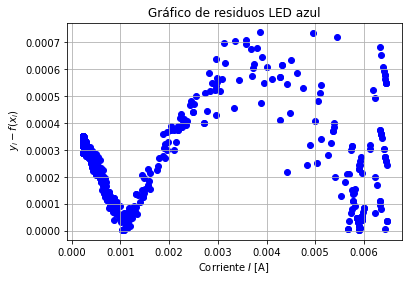

In [337]:
plt.scatter(I_b,residuo_b, color='blue') # puntos (frecuncia, residuos)
plt.grid(True)
plt.xlabel('Corriente $I$ [A] ')
plt.ylabel('$\\ y_i -f(x_i)$')
plt.title('Gráfico de residuos LED azul')

Text(0.5, 1.0, 'Gráfico de residuos LED amarillo')

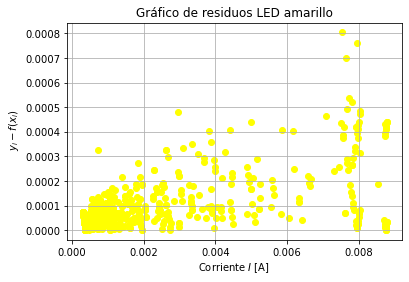

In [338]:

plt.scatter(I_y,residuo_y, color='yellow') # puntos (frecuncia, residuos)
plt.grid(True)
plt.xlabel('Corriente $I$ [A] ')
plt.ylabel('$\\ y_i -f(x_i)$')
plt.title('Gráfico de residuos LED amarillo')

Coeficientes de determinación de los ajustes 

In [321]:



k_g =  exponencial(Vd_G, *coeff_g)

SCT_g = np.sum((I_g- np.mean(I_g))**2) #frecuencia - media de la frecuencia al cuadrado
SCE_g = np.sum((I_g - k_g)**2) #frecuencia - función evaluada en marca de clase l cuadrado
RR_g= (SCT_g-SCE_g)/SCT_g
print("Coeficiente de determinación",RR_g)

k_r =  exponencial(Vd_R, *coeff_r)

SCT_r = np.sum((I_r- np.mean(I_r))**2) #frecuencia - media de la frecuencia al cuadrado
SCE_r = np.sum((I_r - k_r)**2) #frecuencia - función evaluada en marca de clase l cuadrado
RR_r= (SCT_r-SCE_r)/SCT_r
print("Coeficiente de determinación",RR_r)
k_b =  exponencial(Vd_B, *coeff_b)

SCT_b = np.sum((I_b- np.mean(I_b))**2) #frecuencia - media de la frecuencia al cuadrado
SCE_b = np.sum((I_b - k_b)**2) #frecuencia - función evaluada en marca de clase l cuadrado
RR_b= (SCT_b-SCE_b)/SCT_b
print("Coeficiente de determinación",RR_b)
k_y =  cuadratico(Vd_Y, *coeff_y)

SCT_y = np.sum((I_y- np.mean(I_y))**2) #frecuencia - media de la frecuencia al cuadrado
SCE_y = np.sum((I_y - k_y)**2) #frecuencia - función evaluada en marca de clase l cuadrado
RR_y= (SCT_y-SCE_y)/SCT_y
print("Coeficiente de determinación",RR_y)



Coeficiente de determinación 0.9882406960355284
Coeficiente de determinación 0.9843997038935856
Coeficiente de determinación 0.9811076701564756
Coeficiente de determinación 0.9967463439900076
